In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.fft import fft2, fftshift, ifft2, ifftshift

### Analyze Amplitude and Phase Spectra
For each Fourier transform, calculate both the amplitude and phase spectra. The amplitude spectrum indicates the strength of various frequencies, while the phase spectrum gives information about the alignment of these frequencies.

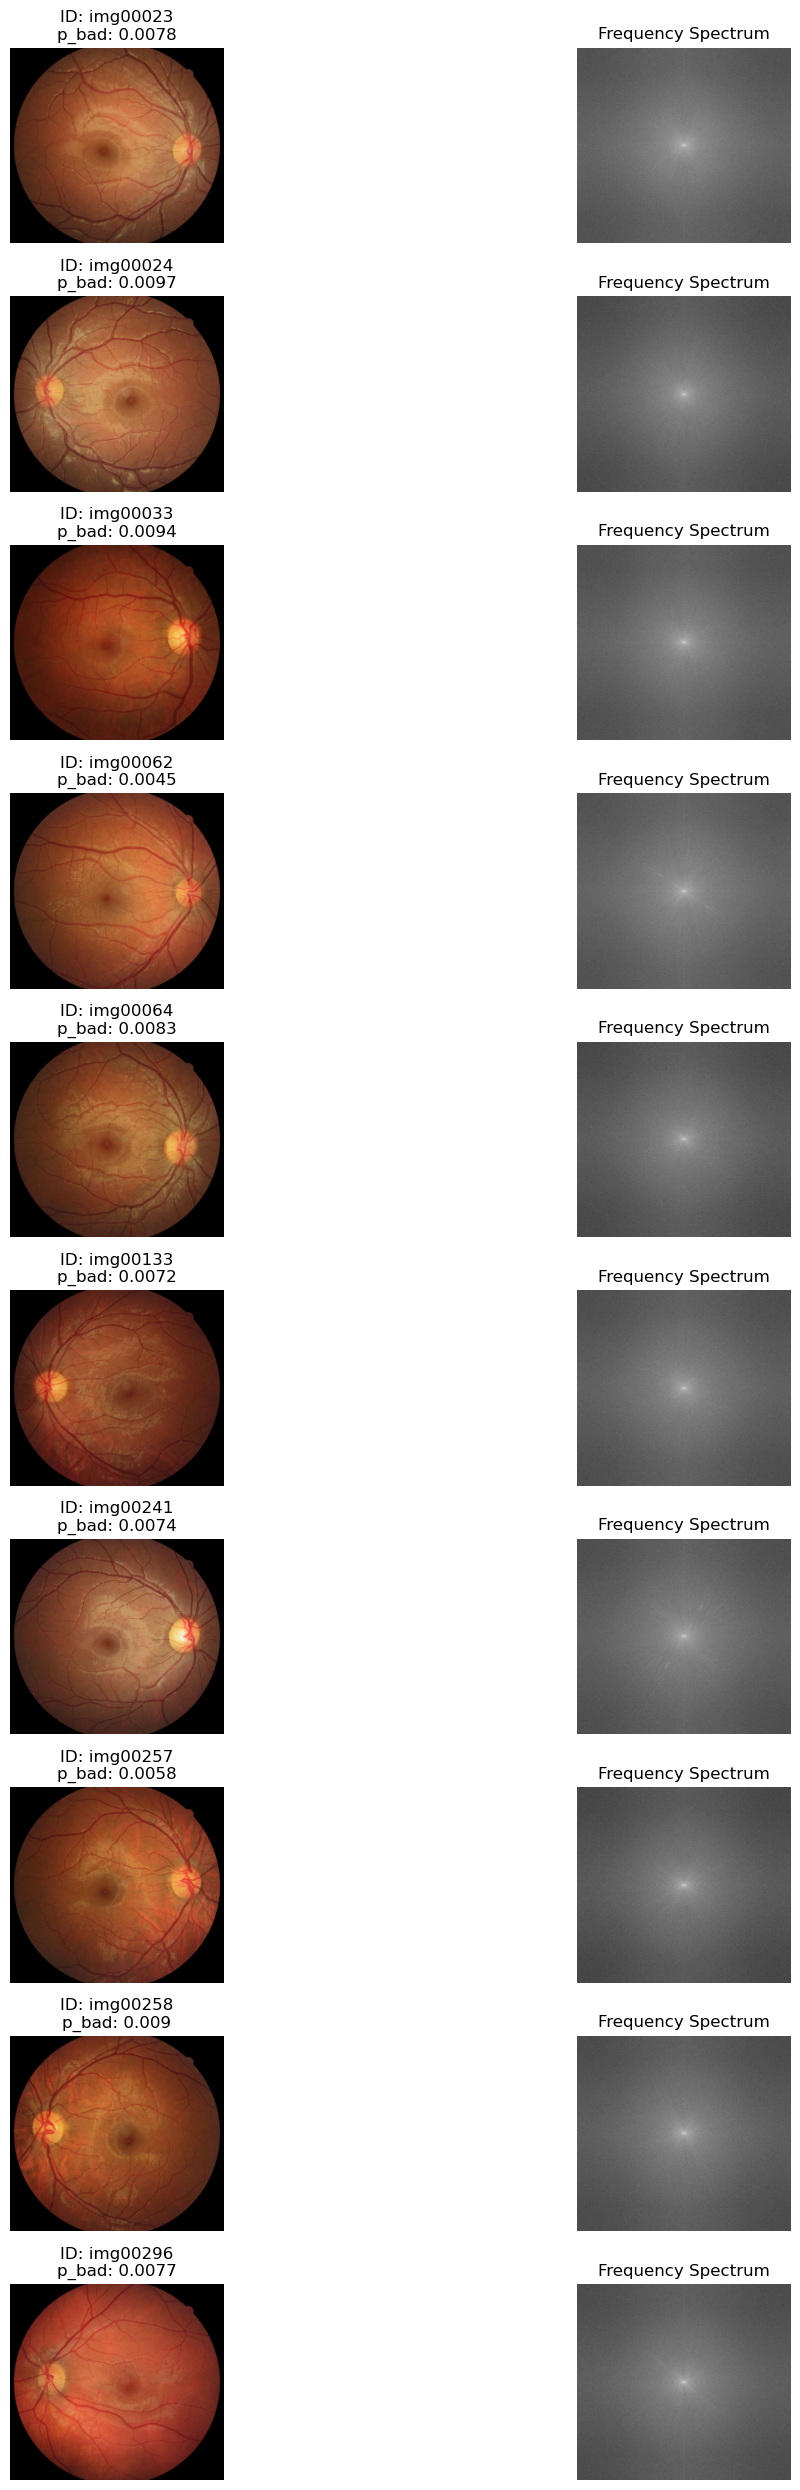

In [33]:
n = 10  # Number of images you want to display; adjust as needed
bad_df = pd.read_csv('./good_examples.csv')

# Define the path where the images are stored
image_folder_path = "../../BRSET/fundus_photos/"

# Calculate the number of rows needed for the subplot layout
num_rows = 2 * n  # Two rows for each image: one for the original and one for the Fourier transform

# Initialize a figure for the original images and their Fourier transforms
plt.figure(figsize=(15, 2.5 * n))  # Adjust figure size as necessary

for index, row in enumerate(bad_df.iloc[:n].itertuples(), start=1):
    image_path = image_folder_path + row.image_id + '.jpg'  # Assuming images are .jpg; adjust if necessary
    img = mpimg.imread(image_path)
    img_gray = np.mean(img, axis=2)  # Convert to grayscale for Fourier Transform
    
    # Compute the 2D Fourier Transform of the image
    f_transform = fft2(img_gray)
    f_shift = fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    
    # Original Image
    plt.subplot(n, 2, 2 * index - 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"ID: {row.image_id}\np_bad: {row.p_bad}")  # Display image ID and p_bad as title
    
    # Fourier Transform Visualization
    plt.subplot(n, 2, 2 * index)  # Positioning the spectrum plots next to the original images
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')
    plt.title("Frequency Spectrum")

plt.tight_layout()
plt.show()


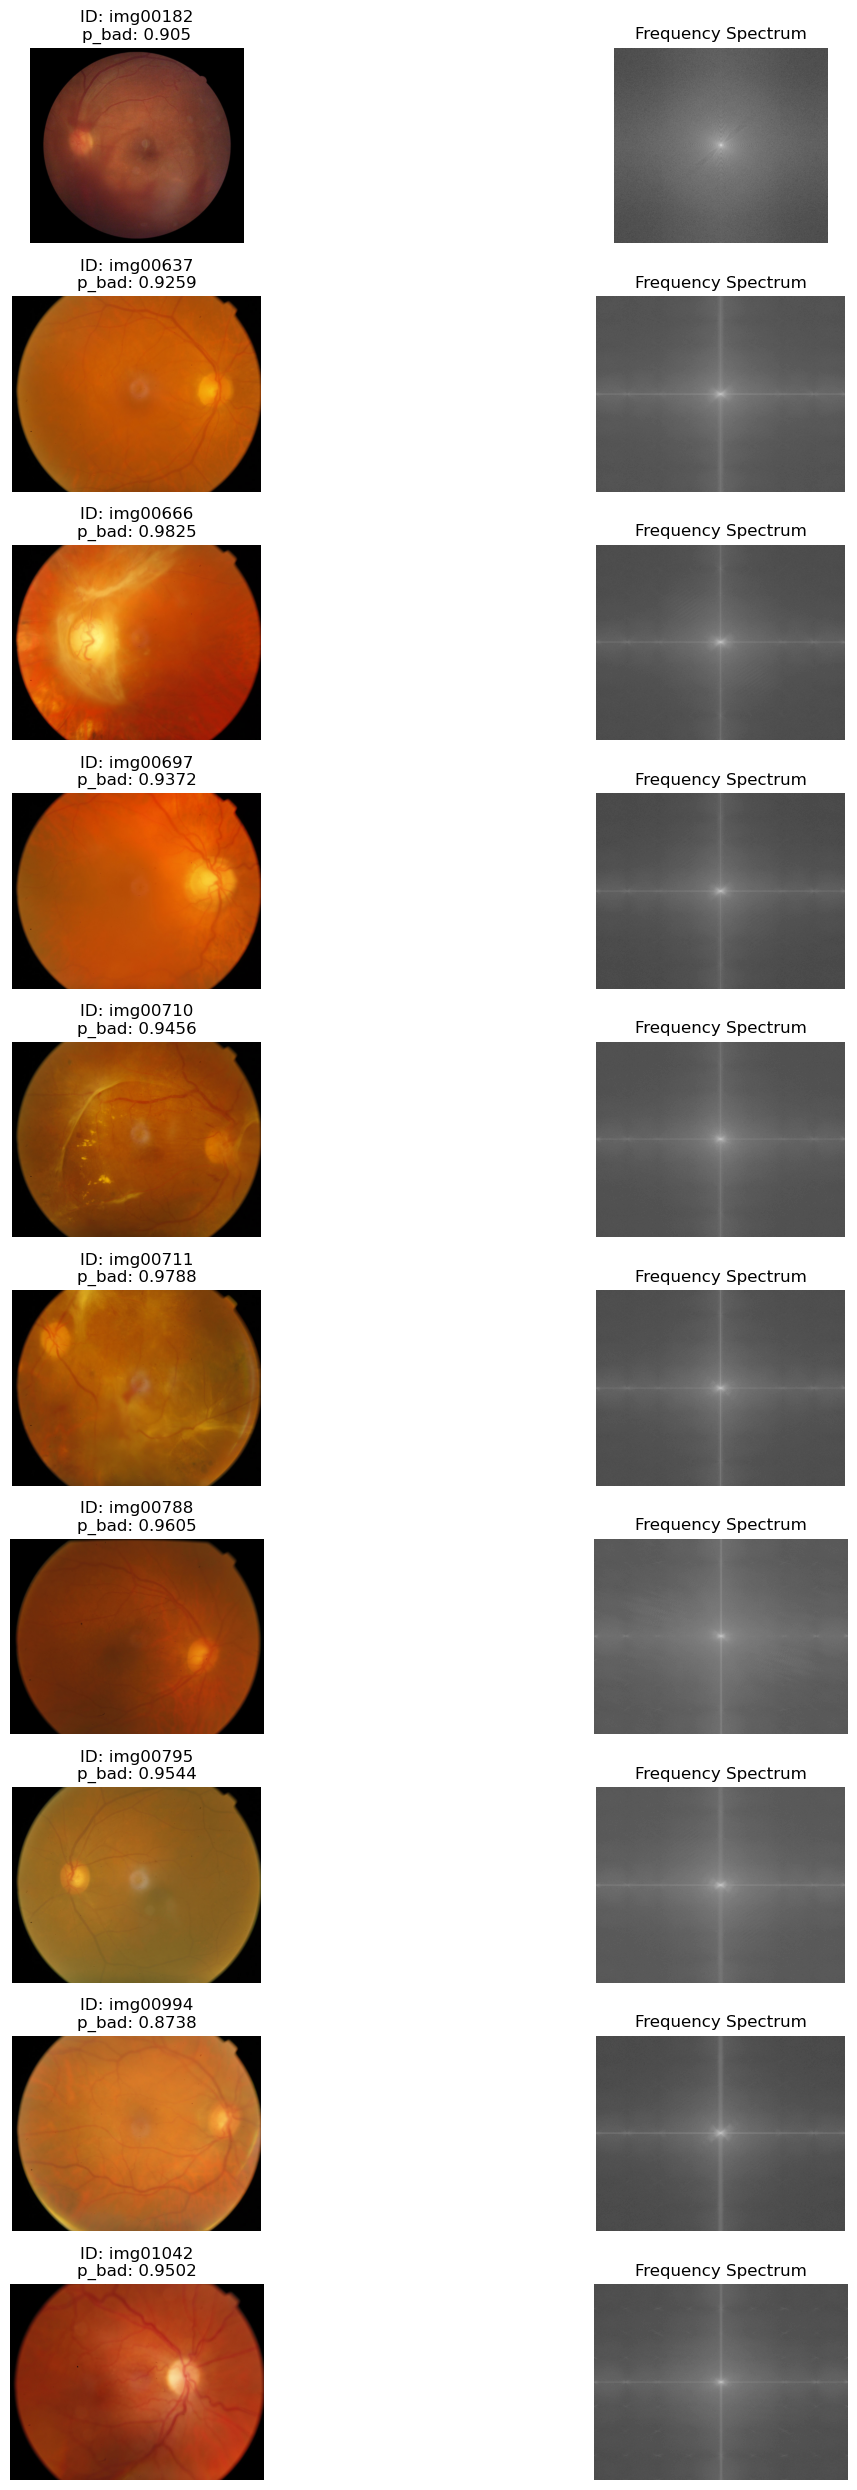

In [34]:
n = 10  # Number of images you want to display; adjust as needed
bad_df = pd.read_csv('./bad_examples.csv')

# Define the path where the images are stored
image_folder_path = "../../BRSET/fundus_photos/"

# Calculate the number of rows needed for the subplot layout
num_rows = 2 * n  # Two rows for each image: one for the original and one for the Fourier transform

# Initialize a figure for the original images and their Fourier transforms
plt.figure(figsize=(15, 2.5 * n))  # Adjust figure size as necessary

for index, row in enumerate(bad_df.iloc[:n].itertuples(), start=1):
    image_path = image_folder_path + row.image_id + '.jpg'  # Assuming images are .jpg; adjust if necessary
    img = mpimg.imread(image_path)
    img_gray = np.mean(img, axis=2)  # Convert to grayscale for Fourier Transform
    
    # Compute the 2D Fourier Transform of the image
    f_transform = fft2(img_gray)
    f_shift = fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    
    # Original Image
    plt.subplot(n, 2, 2 * index - 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"ID: {row.image_id}\np_bad: {row.p_bad}")  # Display image ID and p_bad as title
    
    # Fourier Transform Visualization
    plt.subplot(n, 2, 2 * index)  # Positioning the spectrum plots next to the original images
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')
    plt.title("Frequency Spectrum")

plt.tight_layout()
plt.show()

### Statistical Analysis
Perform statistical analysis on the amplitude and phase spectra of both sets to identify patterns or differences. This could involve:

Mean and Median: Calculate the mean and median of the amplitude spectra for insights into the typical frequency content.
Standard Deviation: Assess the variability within each set regarding frequency content.
Distribution Analysis: Analyze the distribution of dominant frequencies or the presence of specific frequency bands across the sets."

In [21]:
def load_image_compute_fft(image_path):
    # Load the image
    img = mpimg.imread(image_path)
    # Convert to grayscale if it's a color image
    if img.ndim == 3:
        img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    else:
        img_gray = img
    # Compute the Fourier Transform of the image
    fft_img = fft2(img_gray)
    fft_img_shifted = fftshift(fft_img)  # Shift the zero frequency component to the center
    return fft_img_shifted

def calculate_amplitude_spectrum(fft_img):
    # Amplitude Spectrum
    amplitude_spectrum = np.abs(fft_img)
    return amplitude_spectrum


In [22]:
def process_images_and_collect_amplitude_spectra(df, image_folder_path):
    amplitude_spectra = []
    for image_name in df['image_id']:  # Assuming 'image_id' is the column name
        image_path = f"{image_folder_path}/{image_name}.jpg"  # Adjust the extension if necessary
        fft_img_shifted = load_image_compute_fft(image_path)
        amplitude_spectrum = calculate_amplitude_spectrum(fft_img_shifted)
        amplitude_spectra.append(amplitude_spectrum)
    return amplitude_spectra

# Load your dataframes
bad_df = pd.read_csv('./bad_examples.csv')
good_df = pd.read_csv('./good_examples.csv')

# Define the path where the images are stored
image_folder_path = "../../BRSET/fundus_photos/"

# Process images and collect amplitude spectra for both sets
amplitude_spectra_set1 = process_images_and_collect_amplitude_spectra(bad_df, image_folder_path)
amplitude_spectra_set2 = process_images_and_collect_amplitude_spectra(good_df, image_folder_path)


In [23]:
def calculate_statistics(amplitude_spectra):
    # Assuming amplitude_spectra is a list of arrays of the SAME shape
    amplitude_array = np.array(amplitude_spectra)  # This should not raise an error if shapes are uniform
    
    mean_spectrum = np.mean(amplitude_array, axis=0)
    std_dev_spectrum = np.std(amplitude_array, axis=0)
    
    return mean_spectrum, std_dev_spectrum

In [24]:
mean_spectrum_set1, std_spectrum_set1 = calculate_statistics(amplitude_spectra_set1[2])
mean_spectrum_set1, std_spectrum_set1

(array([438.81702193, 462.22720701, 452.37404205, ..., 459.58594144,
        452.37404205, 462.22720701]),
 array([621.89833144, 564.47431252, 566.36455134, ..., 533.31909985,
        566.36455134, 564.47431252]))

In [25]:
mean_spectrum_set2, std_spectrum_set2 = calculate_statistics(amplitude_spectra_set2[2])
mean_spectrum_set2, std_spectrum_set2

(array([  437.17185225,   431.65044608,   438.92024825,   438.87520017,
          452.81847048,   464.48078783,   438.31029225,   432.05503133,
          429.88062289,   435.45317489,   432.20705167,   433.91080313,
          436.20668221,   434.919314  ,   426.62260109,   438.30737895,
          447.54176354,   447.99216267,   439.97231495,   445.47019033,
          436.00301412,   440.48723605,   453.41848763,   450.94098449,
          424.8586767 ,   441.33997621,   441.36455093,   444.22838635,
          441.4372723 ,   431.89966493,   446.25280679,   452.52299092,
          435.0921224 ,   430.61979869,   439.05514621,   447.38368856,
          432.71280087,   428.38403985,   441.36000025,   444.02892652,
          441.09031272,   436.11881957,   431.39961013,   447.3971705 ,
          443.83314495,   426.28924399,   449.14038528,   441.86578774,
          431.57473996,   450.71986616,   434.27084702,   426.21509606,
          428.82933016,   438.01648861,   444.81199591,   440.89

#### Dominant Frequency Analysis
Identify and compare the dominant frequencies in each set. Dominant frequencies are those with the highest amplitudes and are often key to understanding the characteristics of the signal.

In [26]:
def calculate_statistics_with_dominant(amplitude_spectra):
    # Ensure amplitude_spectra is an array, handling both single and multiple spectra
    if len(np.array(amplitude_spectra).shape) == 2:  # Single spectrum
        amplitude_array = np.array([amplitude_spectra])  # Convert to 3D array for uniform processing
    else:
        amplitude_array = np.array(amplitude_spectra)  # Multiple spectra
    
    mean_spectrum = np.mean(amplitude_array, axis=0)
    std_dev_spectrum = np.std(amplitude_array, axis=0)
    
    # Temporarily remove the DC component for dominant frequency analysis
    no_dc_amplitude_array = np.copy(amplitude_array)
    center_coords = (no_dc_amplitude_array.shape[1] // 2, no_dc_amplitude_array.shape[2] // 2)
    no_dc_amplitude_array[:, center_coords[0], center_coords[1]] = 0
    
    # Identify dominant frequency (excluding DC component)
    flat_index = np.argmax(no_dc_amplitude_array, axis=None)
    dominant_frequency_index = np.unravel_index(flat_index, no_dc_amplitude_array.shape[1:])
    
    return mean_spectrum, std_dev_spectrum, dominant_frequency_index


In [27]:
mean_spectrum_set1, std_spectrum_set1, dominant_freq_set1 = calculate_statistics_with_dominant(amplitude_spectra_set1[2])
mean_spectrum_set2, std_spectrum_set2, dominant_freq_set2 = calculate_statistics_with_dominant(amplitude_spectra_set2[2])


In [28]:
mean_spectrum_set1, std_spectrum_set1, dominant_freq_set1

(array([[137.1954    , 136.4150852 , 183.20869071, ..., 179.59166299,
         183.20869071, 136.4150852 ],
        [285.86879055, 152.89476567, 204.22287486, ..., 392.45813576,
         229.99730728, 249.74129725],
        [199.36936433, 337.96729599, 312.01253521, ..., 268.28005767,
         156.80233224, 354.28225274],
        ...,
        [219.93501537, 147.34508594, 300.54784398, ..., 342.59010537,
         321.48203394, 252.53162071],
        [199.36936433, 354.28225274, 156.80233224, ..., 220.2146813 ,
         312.01253521, 337.96729599],
        [285.86879055, 249.74129725, 229.99730728, ..., 465.59069676,
         204.22287486, 152.89476567]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (940, 1194))

In [29]:
mean_spectrum_set2, std_spectrum_set2, dominant_freq_set2

(array([[277.15831416, 262.26666247, 317.83488802, ..., 317.83488802,
         262.26666247, 277.15831416],
        [186.20808452, 496.65632292, 189.05377083, ..., 244.02352946,
         112.73853822, 121.47282586],
        [ 20.0764305 , 235.72296551, 358.33465568, ..., 203.99837306,
         284.0969894 , 318.31016946],
        ...,
        [390.71606204, 159.19961207, 312.59222127, ..., 403.38686977,
         191.99020824, 260.71165433],
        [318.31016946, 284.0969894 , 203.99837306, ..., 358.33465568,
         235.72296551,  20.0764305 ],
        [121.47282586, 112.73853822, 244.02352946, ..., 189.05377083,
         496.65632292, 186.20808452]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (437, 476))

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_dominant_frequencies(mean_spectrum, dominant_freqs, title="Dominant Frequencies Visualization"):
    """
    Visualizes the mean amplitude spectrum and overlays the dominant frequencies.
    
    :param mean_spectrum: 2D array of the mean amplitude spectrum.
    :param dominant_freqs: List of tuples indicating the positions of dominant frequencies.
    :param title: Title for the plot.
    """
    plt.figure(figsize=(10, 8))
    
    # Plot the mean amplitude spectrum
    plt.imshow(np.log(mean_spectrum + 1), cmap='gray', aspect='auto')
    plt.colorbar(label='Log Amplitude')
    
    # Overlay the dominant frequencies
    for freq in dominant_freqs:
        plt.scatter(freq[1], freq[0], color='red', s=100)  # freq[1] is x, freq[0] is y
    
    plt.title(title)
    plt.xlabel('Frequency X')
    plt.ylabel('Frequency Y')
    plt.show()

In [42]:
def compute_fft(image_path):
    img = mpimg.imread(image_path)
    if img.ndim == 3:
        img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    fft_img = fft2(img)
    amplitude = np.abs(fft_img)
    phase = np.angle(fft_img)
    return amplitude, phase

In [43]:
def combine_amplitude_phase(amplitude, phase):
    combined_fft = amplitude * np.exp(1j * phase)
    combined_img = np.real(ifft2(combined_fft))
    return combined_img

In [44]:
def process_images(good_df, bad_df, image_folder_path):
    
    for good_img_name, bad_img_name in zip(good_df['image_id'], bad_df['image_id']):
        good_img_path = f"{image_folder_path}/{good_img_name}.jpg"  # Adjust extension if necessary
        bad_img_path = f"{image_folder_path}/{bad_img_name}.jpg"  # Adjust extension if necessary
        
        good_amplitude, good_phase = compute_fft(good_img_path)
        bad_amplitude, _ = compute_fft(bad_img_path)
        
        combined_img = combine_amplitude_phase(bad_amplitude, good_phase)
        
        # Visualization (Optional)
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 3, 1)
        plt.imshow(mpimg.imread(good_img_path), cmap='gray')
        plt.title('Good Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(mpimg.imread(bad_img_path), cmap='gray')
        plt.title('Bad Image')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(combined_img, cmap='gray')
        plt.title('Combined Image')
        plt.axis('off')
        
        plt.show()

        # To prevent showing all images at once, break or adjust as needed
        break  # Remove or adjust this line to process more images


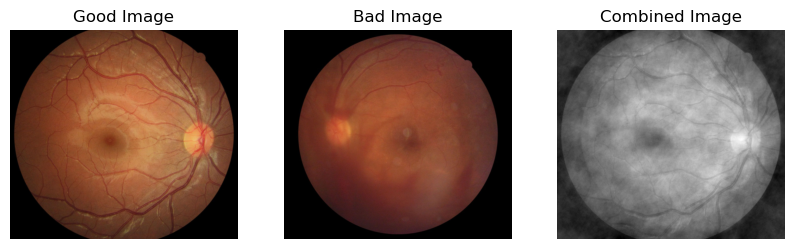

In [45]:
process_images(good_df, bad_df, image_folder_path)

In [49]:
def compute_fft_color(image_path):
    img = mpimg.imread(image_path)
    amplitude_channels = []
    phase_channels = []
    for channel in range(3):  # Assuming RGB
        fft_img = fft2(img[:, :, channel])
        amplitude_channels.append(np.abs(fft_img))
        phase_channels.append(np.angle(fft_img))
    return amplitude_channels, phase_channels


In [50]:
def create_line_mask(shape):
    mask = np.zeros(shape)
    # Example: Add a horizontal line in the middle
    mask[shape[0] // 2, :] = 1
    # Example: Add a vertical line in the middle
    mask[:, shape[1] // 2] = 1
    return mask


In [53]:
def process_and_visualize(good_img_path, bad_img_path):
    # Compute the Fourier transforms
    good_amplitude, good_phase = compute_fft_color(good_img_path)
    #bad_amplitude, _ = compute_fft_color(bad_img_path)
    
    # Assuming all channels have the same shape, use the first one to create a mask
    line_mask = create_line_mask(good_amplitude[0].shape)
    
    # Initialize a list to store the modified channels
    modified_channels = []
    for i in range(3):  # Assuming RGB
        # Apply the frequency lines from the bad image to the good one
        combined_fft = line_mask + good_amplitude[i] * (1 - line_mask)
        combined_img = np.real(ifft2(combined_fft))
        modified_channels.append(combined_img)
    
    # Stack the channels back into a color image
    modified_img = np.stack(modified_channels, axis=-1)
    modified_img = np.clip(modified_img, 0, 1)  # Ensure pixel values are in the valid range
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(mpimg.imread(good_img_path))
    plt.title('Good Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(mpimg.imread(bad_img_path))
    plt.title('Bad Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(modified_img)
    plt.title('Modified Image')
    plt.axis('off')
    
    plt.show()


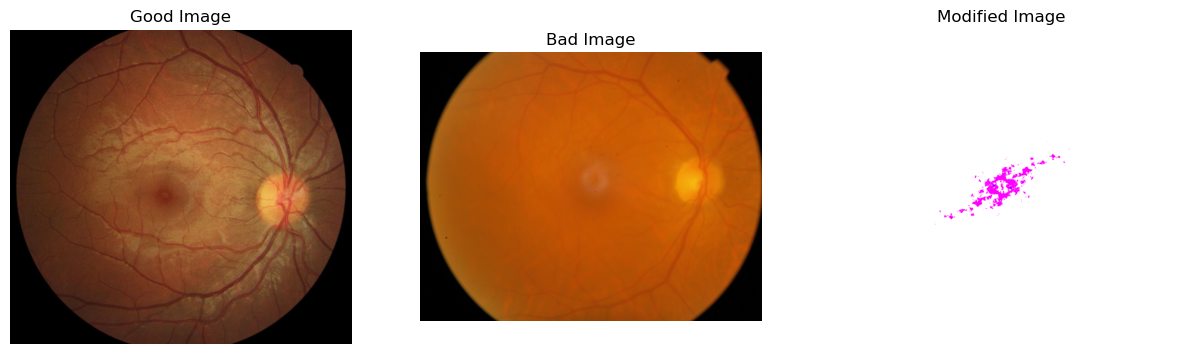

In [54]:
good_img_path = '../../BRSET/fundus_photos/img00064.jpg'
bad_img_path = '../../BRSET/fundus_photos/img00637.jpg'
process_and_visualize(good_img_path, bad_img_path)
